## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load training dataset

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
5,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
6,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
7,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,0
8,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,0
9,57,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,0


In [3]:
df.shape

(22606, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22606 entries, 0 to 22605
Data columns (total 17 columns):
age          22606 non-null int64
job          22606 non-null object
marital      22606 non-null object
education    22606 non-null object
default      22606 non-null object
balance      22606 non-null int64
housing      22606 non-null object
loan         22606 non-null object
contact      22606 non-null object
day          22606 non-null int64
month        22606 non-null object
duration     22606 non-null int64
campaign     22606 non-null int64
pdays        22606 non-null int64
previous     22606 non-null int64
poutcome     22606 non-null object
y            22606 non-null int64
dtypes: int64(8), object(9)
memory usage: 2.9+ MB


In [5]:
# Summary statistics

df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,22606.000000,22606.000000,22606.000000,22606.000000,22606.000000,22606.000000,22606.000000,22606.000000
mean,40.906839,1360.106874,15.826285,256.453287,2.754180,39.914846,0.567947,0.117004
std,10.640958,3068.060471,8.336478,253.361367,3.089615,100.131590,1.865971,0.321433
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,68.000000,8.000000,102.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,440.500000,16.000000,179.500000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1422.750000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,98417.000000,31.000000,3881.000000,55.000000,854.000000,40.000000,1.000000


In [6]:
print(df.y.value_counts())  

0    19961
1     2645
Name: y, dtype: int64


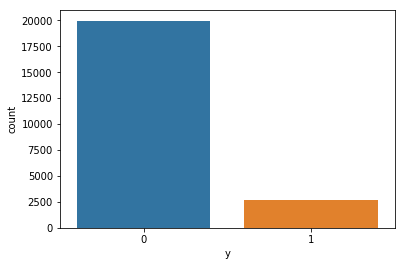

In [7]:
sns.countplot(x="y", data=df)

## Check which columns are numeric or categorical

In [8]:
# get all columns

cols = df.columns
cols

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

We can see the different columns in this dataset above.

### Get numeric columns

In [9]:
num_cols = df._get_numeric_data().columns

In [10]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

The numeric columns in this dataset can be seen above.

### Get categorical columns

In [11]:
list(set(cols) - set(num_cols))

['job',
 'month',
 'education',
 'contact',
 'default',
 'marital',
 'loan',
 'housing',
 'poutcome']

The columns/features mentioned above have categorical variables.

### Print categories of each categorical variable

In [12]:
print(df.contact.unique())

['unknown' 'cellular' 'telephone']


In [13]:
print(df.poutcome.unique())

['unknown' 'failure' 'other' 'success']


In [14]:
print(df.education.unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [15]:
print(df.month.unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [16]:
print(df.housing.unique())

['yes' 'no']


In [17]:
print(df.job.unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'student' 'unknown' 'housemaid']


In [18]:
print(df.default.unique())

['no' 'yes']


In [19]:
print(df.loan.unique())

['no' 'yes']


In [20]:
print(df.marital.unique())

['married' 'single' 'divorced']


In [21]:
# check for null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values in our dataset

### One-hot encode categorical variables

use one-hot encoding (or dummy encoding) to encode the categorical features

In [22]:
contact = pd.get_dummies(df['contact'], prefix = 'contact')
poutcome = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
education = pd.get_dummies(df['education'], prefix = 'education')

month = pd.get_dummies(df['month'], prefix = 'month')
housing = pd.get_dummies(df['housing'], prefix = 'housing')
job = pd.get_dummies(df['job'], prefix = 'job')

default = pd.get_dummies(df['default'], prefix = 'default')
loan = pd.get_dummies(df['loan'], prefix = 'loan')
marital = pd.get_dummies(df['marital'], prefix = 'marital')

In [23]:
# Concat all dummies and continuous variables  

df = pd.concat([contact,poutcome,education,
              month,housing,job,
              default,loan,marital,
              df[['age','balance','day',
                  'duration','campaign','pdays','previous','y']]
              ],
              axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22606 entries, 0 to 22605
Data columns (total 52 columns):
contact_cellular       22606 non-null uint8
contact_telephone      22606 non-null uint8
contact_unknown        22606 non-null uint8
poutcome_failure       22606 non-null uint8
poutcome_other         22606 non-null uint8
poutcome_success       22606 non-null uint8
poutcome_unknown       22606 non-null uint8
education_primary      22606 non-null uint8
education_secondary    22606 non-null uint8
education_tertiary     22606 non-null uint8
education_unknown      22606 non-null uint8
month_apr              22606 non-null uint8
month_aug              22606 non-null uint8
month_dec              22606 non-null uint8
month_feb              22606 non-null uint8
month_jan              22606 non-null uint8
month_jul              22606 non-null uint8
month_jun              22606 non-null uint8
month_mar              22606 non-null uint8
month_may              22606 non-null uint8
month_nov  

In [25]:
df.shape

(22606, 52)

we now have 22606 rows and 52 columns

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
contact_cellular,22606.0,0.646200,0.478159,0.0,0.0,1.0,1.00,1.0
contact_telephone,22606.0,0.065115,0.246735,0.0,0.0,0.0,0.00,1.0
contact_unknown,22606.0,0.288684,0.453161,0.0,0.0,0.0,1.00,1.0
poutcome_failure,22606.0,0.106255,0.308171,0.0,0.0,0.0,0.00,1.0
poutcome_other,22606.0,0.041228,0.198822,0.0,0.0,0.0,0.00,1.0
poutcome_success,22606.0,0.034150,0.181619,0.0,0.0,0.0,0.00,1.0
poutcome_unknown,22606.0,0.818367,0.385550,0.0,1.0,1.0,1.00,1.0
education_primary,22606.0,0.148943,0.356040,0.0,0.0,0.0,0.00,1.0
education_secondary,22606.0,0.513138,0.499838,0.0,0.0,1.0,1.00,1.0
education_tertiary,22606.0,0.296028,0.456513,0.0,0.0,0.0,1.00,1.0


## Define training data

In [27]:
X_train = df.iloc[:, 0:51]
X_train.head(10)

,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,...,marital_divorced,marital_married,marital_single,age,balance,day,duration,campaign,pdays,previous
0,0,0,1,0,0,0,1,0,0,1,...,0,1,0,58,2143,5,261,1,-1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,1,0,33,2,5,76,1,-1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,1,0,47,1506,5,92,1,-1,0
4,0,0,1,0,0,0,1,0,0,1,...,0,1,0,35,231,5,139,1,-1,0
5,0,0,1,0,0,0,1,0,0,1,...,0,0,1,28,447,5,217,1,-1,0
6,0,0,1,0,0,0,1,1,0,0,...,0,1,0,58,121,5,50,1,-1,0
7,0,0,1,0,0,0,1,0,1,0,...,0,0,1,29,390,5,137,1,-1,0
8,0,0,1,0,0,0,1,0,0,0,...,0,1,0,58,71,5,71,1,-1,0
9,0,0,1,0,0,0,1,0,1,0,...,0,1,0,57,162,5,174,1,-1,0


In [28]:
X_train.isnull().sum()

contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
housing_no             0
housing_yes            0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
default_no             0
default_yes            0
loan_no                0


In [29]:
# specify y_train

y_train = df['y']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [30]:
y_train.isnull().sum()

0

## Load testing dataset

In [31]:
dat = pd.read_csv('test.csv')
dat.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
1,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
2,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0
3,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,0
4,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,0
5,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,0
6,56,management,married,tertiary,no,779,yes,no,unknown,5,may,164,1,-1,0,unknown,0
7,32,blue-collar,single,primary,no,23,yes,yes,unknown,5,may,160,1,-1,0,unknown,0
8,25,services,married,secondary,no,50,yes,no,unknown,5,may,342,1,-1,0,unknown,0
9,57,technician,married,secondary,no,839,no,yes,unknown,5,may,225,1,-1,0,unknown,0


In [32]:
dat.shape

(22605, 17)

In [33]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 17 columns):
age          22605 non-null int64
job          22605 non-null object
marital      22605 non-null object
education    22605 non-null object
default      22605 non-null object
balance      22605 non-null int64
housing      22605 non-null object
loan         22605 non-null object
contact      22605 non-null object
day          22605 non-null int64
month        22605 non-null object
duration     22605 non-null int64
campaign     22605 non-null int64
pdays        22605 non-null int64
previous     22605 non-null int64
poutcome     22605 non-null object
y            22605 non-null int64
dtypes: int64(8), object(9)
memory usage: 2.9+ MB


In [34]:
print(dat.y.value_counts())  

0    19961
1     2644
Name: y, dtype: int64


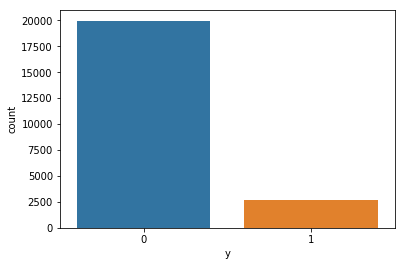

In [35]:
sns.countplot(x="y", data=dat)

In [36]:
dat.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

we don't have any null values in this dataset

## Check which columns are categorical

In [37]:
# show all columns

col = dat.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Get numeric columns

In [38]:
# show numeric columns

num_col = dat._get_numeric_data().columns
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

### Get categorical columns

In [39]:
# show categorical columns

list(set(col) - set(num_col))

['job',
 'month',
 'education',
 'contact',
 'default',
 'marital',
 'loan',
 'housing',
 'poutcome']

### Print categories of each categorical variable

In [40]:
print(dat.default.unique())

['no' 'yes']


In [41]:
print(dat.contact.unique())

['unknown' 'cellular' 'telephone']


In [42]:
print(dat.month.unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [43]:
print(dat.loan.unique())

['no' 'yes']


In [44]:
print(dat.housing.unique())

['no' 'yes']


In [45]:
print(dat.marital.unique())

['single' 'divorced' 'married']


In [46]:
print(dat.job.unique())

['unknown' 'entrepreneur' 'technician' 'admin.' 'blue-collar' 'management'
 'services' 'retired' 'self-employed' 'housemaid' 'unemployed' 'student']


In [47]:
print(dat.poutcome.unique())

['unknown' 'other' 'failure' 'success']


In [48]:
print(dat.education.unique())

['unknown' 'tertiary' 'secondary' 'primary']


### One-hot encode categorical variables

use one-hot encoding (or dummy encoding) to encode the categorical features

In [49]:
contact = pd.get_dummies(dat['contact'], prefix = 'contact')
poutcome = pd.get_dummies(dat['poutcome'], prefix = 'poutcome')
education = pd.get_dummies(dat['education'], prefix = 'education')

month = pd.get_dummies(dat['month'], prefix = 'month')
housing = pd.get_dummies(dat['housing'], prefix = 'housing')
job = pd.get_dummies(dat['job'], prefix = 'job')

default = pd.get_dummies(dat['default'], prefix = 'default')
loan = pd.get_dummies(dat['loan'], prefix = 'loan')
marital = pd.get_dummies(dat['marital'], prefix = 'marital')

In [50]:
# Concat all dummies and continuous variables  

dat = pd.concat([contact,poutcome,education,
              month,housing,job,
              default,loan,marital,
              dat[['age','balance','day',
                  'duration','campaign','pdays','previous','y']]
              ],
              axis=1)

In [51]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 52 columns):
contact_cellular       22605 non-null uint8
contact_telephone      22605 non-null uint8
contact_unknown        22605 non-null uint8
poutcome_failure       22605 non-null uint8
poutcome_other         22605 non-null uint8
poutcome_success       22605 non-null uint8
poutcome_unknown       22605 non-null uint8
education_primary      22605 non-null uint8
education_secondary    22605 non-null uint8
education_tertiary     22605 non-null uint8
education_unknown      22605 non-null uint8
month_apr              22605 non-null uint8
month_aug              22605 non-null uint8
month_dec              22605 non-null uint8
month_feb              22605 non-null uint8
month_jan              22605 non-null uint8
month_jul              22605 non-null uint8
month_jun              22605 non-null uint8
month_mar              22605 non-null uint8
month_may              22605 non-null uint8
month_nov  

In [52]:
dat.shape

(22605, 52)

In [53]:
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
contact_cellular,22605.0,0.649281,0.477206,0.0,0.0,1.0,1.0,1.0
contact_telephone,22605.0,0.063437,0.243753,0.0,0.0,0.0,0.0,1.0
contact_unknown,22605.0,0.287282,0.452504,0.0,0.0,0.0,1.0,1.0
poutcome_failure,22605.0,0.110551,0.313582,0.0,0.0,0.0,0.0,1.0
poutcome_other,22605.0,0.040168,0.196358,0.0,0.0,0.0,0.0,1.0
poutcome_success,22605.0,0.032692,0.177833,0.0,0.0,0.0,0.0,1.0
poutcome_unknown,22605.0,0.816589,0.387011,0.0,1.0,1.0,1.0,1.0
education_primary,22605.0,0.154125,0.361077,0.0,0.0,0.0,0.0,1.0
education_secondary,22605.0,0.513249,0.499835,0.0,0.0,1.0,1.0,1.0
education_tertiary,22605.0,0.292369,0.454861,0.0,0.0,0.0,1.0,1.0


## Define testing data

In [54]:
X_test = dat.iloc[:, 0:51]
X_test.head(10)

,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,...,marital_divorced,marital_married,marital_single,age,balance,day,duration,campaign,pdays,previous
0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,33,1,5,198,1,-1,0
1,0,0,1,0,0,0,1,0,0,1,...,1,0,0,42,2,5,380,1,-1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,1,43,593,5,55,1,-1,0
3,0,0,1,0,0,0,1,0,1,0,...,1,0,0,41,270,5,222,1,-1,0
4,0,0,1,0,0,0,1,0,1,0,...,0,1,0,53,6,5,517,1,-1,0
5,0,0,1,0,0,0,1,1,0,0,...,0,1,0,57,52,5,38,1,-1,0
6,0,0,1,0,0,0,1,0,0,1,...,0,1,0,56,779,5,164,1,-1,0
7,0,0,1,0,0,0,1,1,0,0,...,0,0,1,32,23,5,160,1,-1,0
8,0,0,1,0,0,0,1,0,1,0,...,0,1,0,25,50,5,342,1,-1,0
9,0,0,1,0,0,0,1,0,1,0,...,0,1,0,57,839,5,225,1,-1,0


In [55]:
X_test.isnull().sum()

contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
housing_no             0
housing_yes            0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
default_no             0
default_yes            0
loan_no                0


In [56]:
# specify 'y_test'

y_test = dat['y']
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [57]:
pd.crosstab(index=dat['y'],columns="count")

col_0,count
y,
0,19961
1,2644


In [58]:
y_test.isnull().sum() # no null values

0

### Normalize Data

Normalize the data into the scale range [0, 1]

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Create a scaler to do the transformation

scaler = MinMaxScaler().fit(X_train)

Don't normalize 'y' variable as it is a binary variable and is alteady normalized.

In [61]:
# Transform X_train

X_train_scale = scaler.transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale)
X_train_scale.columns = X_train.columns

X_train_scale.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
contact_cellular,22606.0,0.646200,0.478159,0.0,0.0,1.0,1.0,1.0
contact_telephone,22606.0,0.065115,0.246735,0.0,0.0,0.0,0.0,1.0
contact_unknown,22606.0,0.288684,0.453161,0.0,0.0,0.0,1.0,1.0
poutcome_failure,22606.0,0.106255,0.308171,0.0,0.0,0.0,0.0,1.0
poutcome_other,22606.0,0.041228,0.198822,0.0,0.0,0.0,0.0,1.0


In [62]:
# Transform X_test

X_test_scale = scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale)
X_test_scale.columns = X_test.columns

X_test_scale.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
contact_cellular,22605.0,0.649281,0.477206,0.0,0.0,1.0,1.0,1.0
contact_telephone,22605.0,0.063437,0.243753,0.0,0.0,0.0,0.0,1.0
contact_unknown,22605.0,0.287282,0.452504,0.0,0.0,0.0,1.0,1.0
poutcome_failure,22605.0,0.110551,0.313582,0.0,0.0,0.0,0.0,1.0
poutcome_other,22605.0,0.040168,0.196358,0.0,0.0,0.0,0.0,1.0


In [63]:
X_test_scale.head()

,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,...,marital_divorced,marital_married,marital_single,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.194805,0.033137,0.133333,0.051018,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.311688,0.033147,0.133333,0.097913,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.324675,0.038953,0.133333,0.014172,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.298701,0.035780,0.133333,0.057202,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.454545,0.033186,0.133333,0.133213,0.0,0.0,0.0


In [64]:
# checking data types

X_train_scale.dtypes 

contact_cellular       float64
contact_telephone      float64
contact_unknown        float64
poutcome_failure       float64
poutcome_other         float64
poutcome_success       float64
poutcome_unknown       float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
month_apr              float64
month_aug              float64
month_dec              float64
month_feb              float64
month_jan              float64
month_jul              float64
month_jun              float64
month_mar              float64
month_may              float64
month_nov              float64
month_oct              float64
month_sep              float64
housing_no             float64
housing_yes            float64
job_admin.             float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_serv

In [65]:
y_train.dtypes

dtype('int64')

## MODELS

## 1. a. Logistic Regression (without class weight)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

'l1' penalty pushes feature coefficients to 0

In [67]:
log_model = LogisticRegression(penalty='l1')

In [68]:
# Fit Model

log_model.fit(X_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Make predictions

In [69]:
log_pred = log_model.predict(X_test_scale)

Let's evaluate our first logistic model..

#### Evaluations:

#### confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
cm = confusion_matrix(y_test, log_pred)
cm

array([[19455,   506],
       [ 1716,   928]], dtype=int64)

#### classification report

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     19961
           1       0.65      0.35      0.46      2644

   micro avg       0.90      0.90      0.90     22605
   macro avg       0.78      0.66      0.70     22605
weighted avg       0.89      0.90      0.89     22605



Let's also get accuracy, recall and precision score values

#### accuracy, recall, precision scores and AUC score

In [74]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [75]:
metrics.accuracy_score(y_test, log_pred)

0.9017031630170317

In [76]:
metrics.recall_score(y_test, log_pred)

0.35098335854765506

In [77]:
metrics.precision_score(y_test, log_pred)

0.6471408647140865

#### AUC Score

In [78]:
auc_score = metrics.roc_auc_score(y_test, log_pred)
auc_score

0.6628169635782211

AUC score is not what we are aiming for at the moment so let us develop a logistic model with class weights and check if we can improve this score

## 1.b. Logistic Regression (with class weight)

To find the right value of parameter 'C' we can try some combinations of different values. GridSearch involves creating a grid  
of parameters and trying all possible combinations.

We create a dictionary and fill it with different values of parameter 'C' and then fit training data to the developed model.

To deal with imbalanced dataset, we set 'class_weight' equal to 'balanced'

In [79]:
# Import GridSearchCV from scikit learn

from sklearn.model_selection import GridSearchCV

Log_reg = LogisticRegression()


# Create a dictionary and fill out some values of 'C'

log_reg_param = {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 300, 600], 'penalty': ['l1'],
                'solver':['liblinear'], 'random_state': [900], 'max_iter': [1000], 'class_weight': ['balanced']}


# The GridSearchCV object created below is fitted to the training data

log_model_1 = GridSearchCV(Log_reg, log_reg_param, scoring = 'roc_auc', refit=True)

log_model_1.fit(X_train_scale, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 300, 600], 'penalty': ['l1'], 'solver': ['liblinear'], 'random_state': [900], 'max_iter': [1000], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Find the best parameters found by GridSearchCV

In [80]:
log_model_1.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'max_iter': 1000,
 'penalty': 'l1',
 'random_state': 900,
 'solver': 'liblinear'}

Make predictions using testing data

In [81]:
log_model1_pred = log_model_1.predict(X_test_scale)

Performance evaluation of this model can be done by developing confusion matrix, classification report,and calculating values of accuracy, recall, precision score and AUC score as shown below.

In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, log_model1_pred)
cm

array([[16966,  2995],
       [  494,  2150]], dtype=int64)

#### classification report

In [83]:
print(classification_report(y_test, log_model1_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     19961
           1       0.42      0.81      0.55      2644

   micro avg       0.85      0.85      0.85     22605
   macro avg       0.69      0.83      0.73     22605
weighted avg       0.91      0.85      0.87     22605



#### accuracy, recall and precision score

In [84]:
metrics.accuracy_score(y_test, log_model1_pred)

0.8456536164565361

In [85]:
metrics.recall_score(y_test, log_model1_pred)

0.813161875945537

In [86]:
metrics.precision_score(y_test, log_model1_pred)

0.41788143828960156

#### AUC Score

In [87]:
metrics.roc_auc_score(y_test, log_model1_pred)

0.8315596464543075

The above AUC score is very good and has improved from our previous model.

Let's try some other models...

## 2. k-NN Classifier

Call neighbors from sklearn

In [88]:
from sklearn import neighbors

Create a KNN classifier model with n_neighbors = 5

In [89]:
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

Fit this model to training data

In [90]:
knn5.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Use testing data to make some predictions

In [91]:
pred_y_knn5 = knn5.predict(X_test_scale)

Let us evaluate our model by developing a confusion metrix for this model

In [92]:
cm = metrics.confusion_matrix(y_test, pred_y_knn5)
print(cm)

[[19476   485]
 [ 2035   609]]


In [93]:
# Calculate classification accuracy

metrics.accuracy_score(y_test, pred_y_knn5)

0.8885202388852024

#### AUC score

In [94]:
# Calculate AUC

metrics.roc_auc_score(y_test, pred_y_knn5)

0.6030177245780558

The above AUC score is not what we are aiming for as it is less than 0.72

We can also find values of some other metrics as shown below.

In [95]:
# Calculate Cohen's Kappa

metrics.cohen_kappa_score(y_test, pred_y_knn5)

0.2762946248201904

In [96]:
# Print classification report

print(metrics.classification_report(y_test, pred_y_knn5))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     19961
           1       0.56      0.23      0.33      2644

   micro avg       0.89      0.89      0.89     22605
   macro avg       0.73      0.60      0.63     22605
weighted avg       0.86      0.89      0.87     22605



### Tune k-NN classifier

Let's tune the k parameter by using a loop which trains different k-NN models for different values of k and gives us respective AUC values

We are only using AUC score as a measure of performance for our models

In [97]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(X_train_scale, y_train)
    pred_y = knn.predict(X_test_scale)
    print("AUC is ", round(metrics.roc_auc_score(y_test, pred_y)*100,2),"% for k =",k)

AUC is  62.87 % for k = 1
AUC is  56.92 % for k = 2
AUC is  61.11 % for k = 3
AUC is  57.17 % for k = 4
AUC is  60.3 % for k = 5
AUC is  57.28 % for k = 6
AUC is  58.9 % for k = 7
AUC is  57.46 % for k = 8
AUC is  58.77 % for k = 9
AUC is  57.36 % for k = 10
AUC is  58.52 % for k = 11
AUC is  57.1 % for k = 12
AUC is  58.04 % for k = 13
AUC is  57.02 % for k = 14
AUC is  57.8 % for k = 15
AUC is  56.95 % for k = 16
AUC is  57.69 % for k = 17
AUC is  56.71 % for k = 18
AUC is  57.22 % for k = 19
AUC is  56.54 % for k = 20


Now, let's use the test dataset to assess the performance of the k-NN (k=1) model as it gives us the maximum AUC value

Create a KNN classifier model with n_neighbors = 1 and fit training data for training before using the testing data to make predictions

In [98]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors = 1, weights='uniform', algorithm='auto')
knn1.fit(X_train_scale, y_train)
pred_y_knn1 = knn.predict(X_test_scale)

Let's evaluate the performance of this model

In [99]:
# Print confusion matrix

metrics.confusion_matrix(y_test, pred_y_knn1)

array([[19786,   175],
       [ 2275,   369]], dtype=int64)

In [100]:
# Calculate classification accuracy

metrics.accuracy_score(y_test, pred_y_knn1)

0.891616898916169

#### AUC Score

In [101]:
# Calculate AUC

metrics.roc_auc_score(y_test, pred_y_knn1)

0.5653970874824668

The above AUC score is still not what we are aiming for.

In [102]:
# Calculate Cohen's Kappa

metrics.cohen_kappa_score(y_test, pred_y_knn1)

0.19954044677183358

In [103]:
# Print classification report

print(metrics.classification_report(y_test, pred_y_knn1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19961
           1       0.68      0.14      0.23      2644

   micro avg       0.89      0.89      0.89     22605
   macro avg       0.79      0.57      0.59     22605
weighted avg       0.87      0.89      0.86     22605



### Compare two k-NN Models

We can compare the AUC scores for the above two k-NN models as shown below

In [104]:
auc = [metrics.roc_auc_score(y_test, pred_y_knn5),
       metrics.roc_auc_score(y_test, pred_y_knn1)] 

In [105]:
pd.DataFrame({'AUC Score':auc}, index = ['k-NN (k=5)','k-NN (k=1)']) 

,AUC Score
k-NN (k=5),0.603018
k-NN (k=1),0.565397



Let's develop a deep learning neural network model and check if we can improve our AUC score


## 3. Deep Learning Model

We can preprocess the data before developing our neural network (NN) model

In [106]:
X_train_NN = np.array(X_train_scale)
X_test_NN = np.array(X_test_scale)
y_train_NN = np.array(y_train)
y_test_NN = np.array(y_test)

### Import libraries

In [107]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import keras.backend as K

Using TensorFlow backend.


### Model Architecture

Since, this is a classification problem, our activation function for the final output 'Dense' layer will be a 'sigmoid' function. We are also using a dropout value of 0.5.

In [108]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=51, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile Model

Our loss will be 'binary_crossentropy' as this is a classification problem

In [109]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

### Summarize Model

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                624       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


We can monitor 'loss' and stop iterarions if 'loss' stops changing. This will save us time while running the model. We plan to do this by using 'early_stop' as shown below

In [111]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

### Fit Model using training dataset

In [112]:
model.fit(X_train_NN, y_train_NN, batch_size=15, epochs=50)

Epoch 1/50
22606/22606 [==============================] - 4s 196us/step - loss: 0.3454 - acc: 0.8776
Epoch 2/50
22606/22606 [==============================] - 5s 203us/step - loss: 0.2689 - acc: 0.8924 0s - loss: 0.2694 - acc: 0.8
Epoch 3/50
22606/22606 [==============================] - 4s 172us/step - loss: 0.2456 - acc: 0.8945
Epoch 4/50
22606/22606 [==============================] - 4s 170us/step - loss: 0.2369 - acc: 0.8971 0s - loss: 0.2370 - acc: 0.
Epoch 5/50
22606/22606 [==============================] - 4s 189us/step - loss: 0.2339 - acc: 0.8976 1s
Epoch 6/50
22606/22606 [==============================] - 4s 197us/step - loss: 0.2319 - acc: 0.9000
Epoch 7/50
22606/22606 [==============================] - 6s 258us/step - loss: 0.2288 - acc: 0.9013
Epoch 8/50
22606/22606 [==============================] - 4s 188us/step - loss: 0.2267 - acc: 0.9007
Epoch 9/50
22606/22606 [==============================] - 4s 174us/step - loss: 0.2258 - acc: 0.9001
Epoch 10/50
22606/22606 [======

### Performance evaluation

In [113]:
score = model.evaluate(X_test_NN, y_test_NN)

22605/22605 [==============================] - 1s 27us/step


In [114]:
print(score)

[0.21847816420403024, 0.9046228710475471]


##### Accuracy Score

In [115]:
print("The Accuracy score on the training set is:\t{:0.4f}".format(score[1]))

The Accuracy score on the training set is:	0.9046


Let's develop a confusion matrix for this model and also calculate AUC score

In [116]:
y_pred = model.predict(X_test_NN)
y_test_NN = pd.DataFrame(y_test_NN)

In [117]:
cm_NN = confusion_matrix(y_test_NN, y_pred.round())
cm_NN

array([[19263,   698],
       [ 1458,  1186]], dtype=int64)

### AUC Score

In [118]:
metrics.roc_auc_score(y_test_NN, y_pred)

0.9202231890006997

The above AUC score is the maximum value that we have right now.

## Compare AUC scores of all models

We can compare the AUC scores of all the models developed by us

In [119]:
auc = [metrics.roc_auc_score(y_test, log_pred),
       metrics.roc_auc_score(y_test, log_model1_pred),
       metrics.roc_auc_score(y_test, pred_y_knn5),
       metrics.roc_auc_score(y_test, pred_y_knn1),
      metrics.roc_auc_score(y_test_NN, y_pred)]

In [120]:
pd.DataFrame({'AUC Score':auc}, index = ['Logistic Regression (without class weights)', 
                                         'Logistic Regression (with class weights)',
                                         'k-NN (k=5)','k-NN (k=1)', 'Deep Learning'])

,AUC Score
Logistic Regression (without class weights),0.662817
Logistic Regression (with class weights),0.831560
k-NN (k=5),0.603018
k-NN (k=1),0.565397
Deep Learning,0.920223


**We choose the deep learning neural network model as it gives the maximum AUC value of 0.920223